First, lets read the data into a pandas DataFrame.

In [2]:
from sklearn.cluster import KMeans
import pandas as pd

file_name = '../../../data/medbioinfo/CyTOF_dataset.csv'

df = pd.read_csv(file_name, index_col=0)


In [3]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.values[:10000,:])



Automatically created module for IPython interactive environment
(10000, 39)
For n_clusters = 4 The average silhouette_score is : 0.39937141146


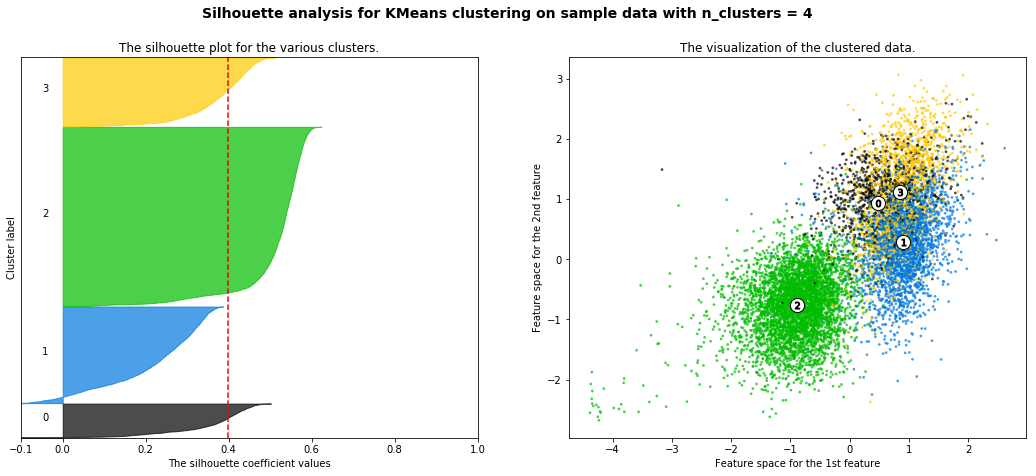

For n_clusters = 5 The average silhouette_score is : 0.406240858507


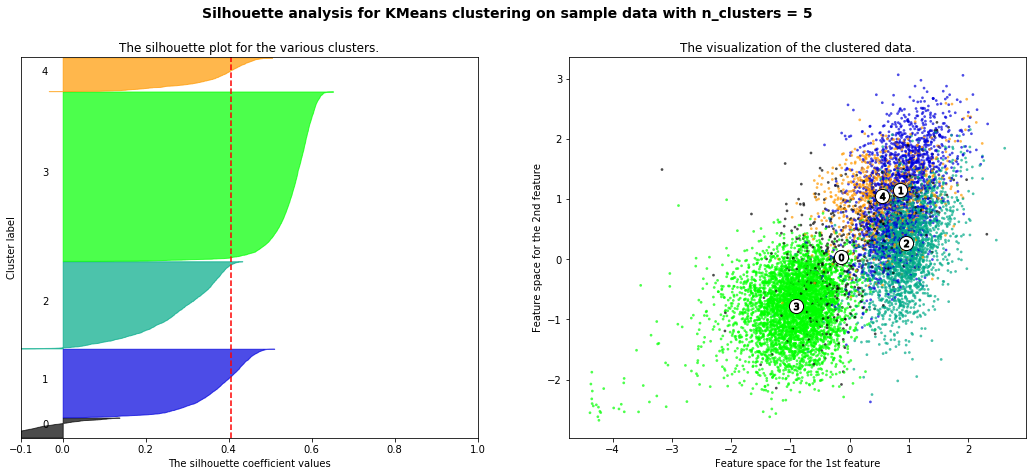

For n_clusters = 6 The average silhouette_score is : 0.403074248105


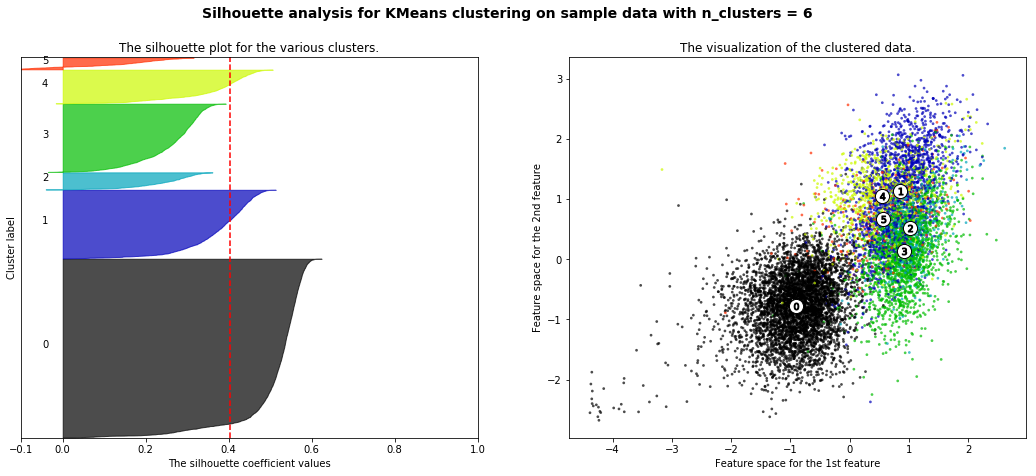

For n_clusters = 7 The average silhouette_score is : 0.37588515977


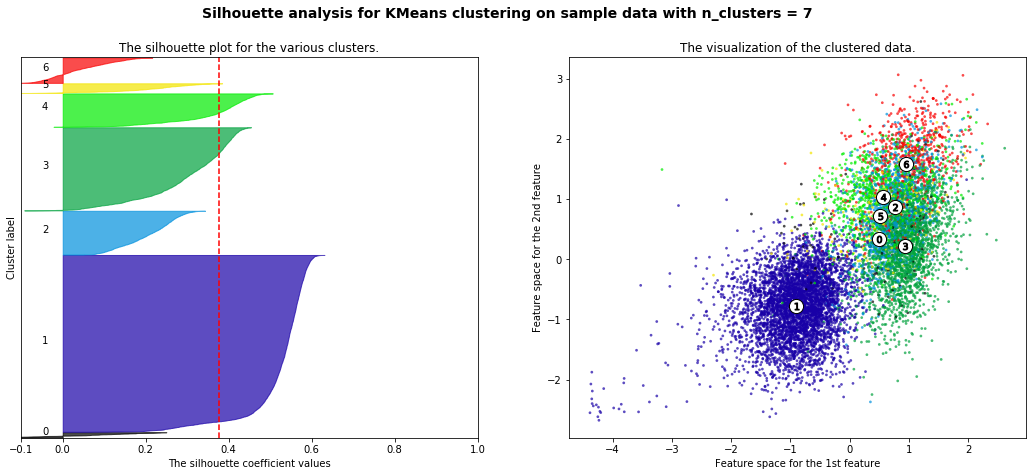

For n_clusters = 8 The average silhouette_score is : 0.213457667856


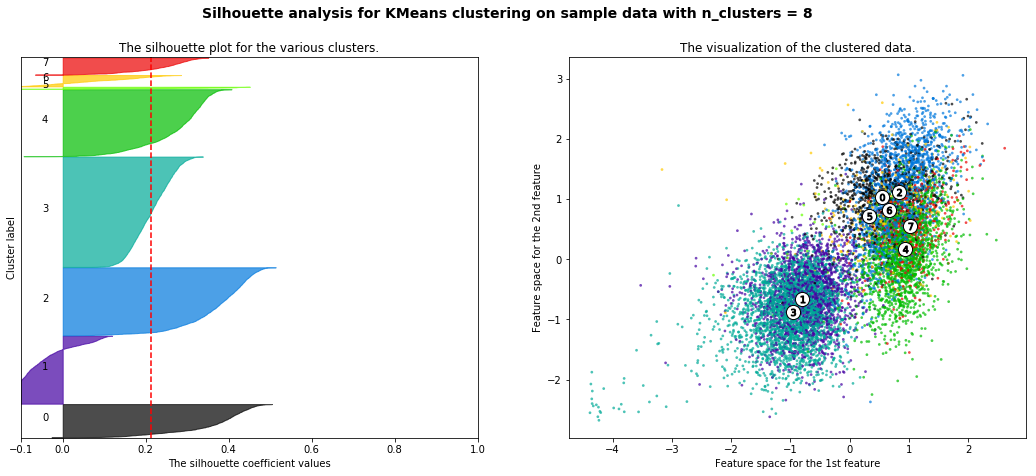

For n_clusters = 9 The average silhouette_score is : 0.346418536945


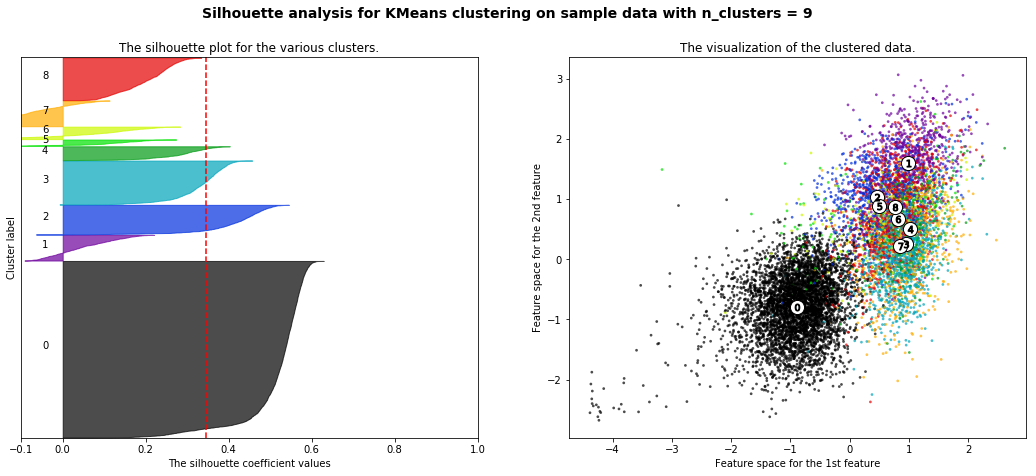

For n_clusters = 10 The average silhouette_score is : 0.336603877382


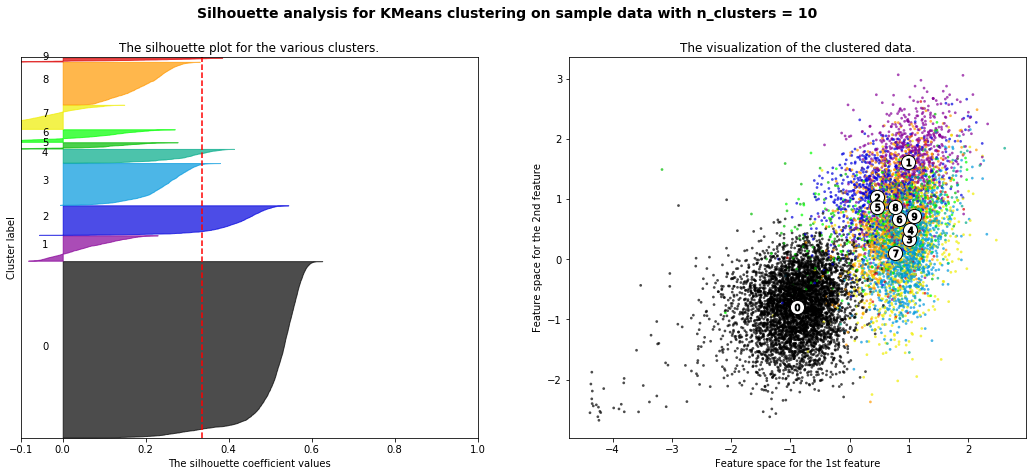

For n_clusters = 11 The average silhouette_score is : 0.148963516657


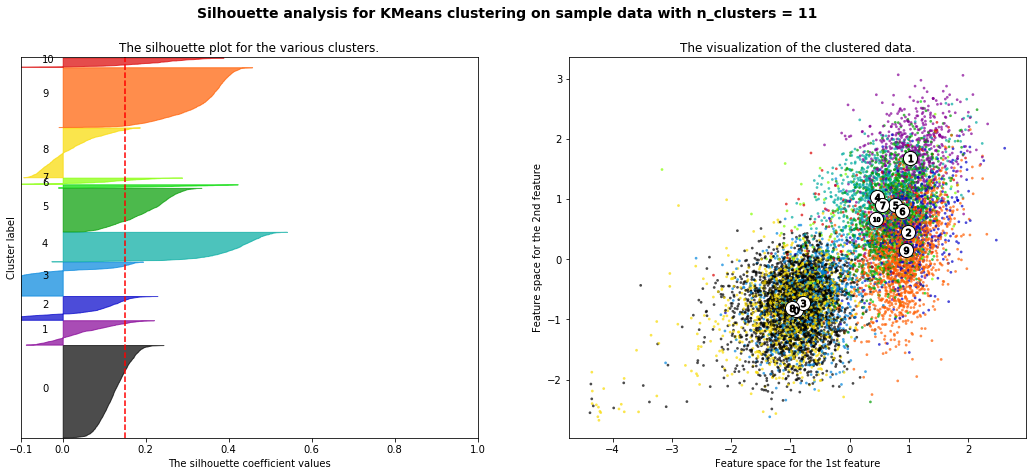

For n_clusters = 12 The average silhouette_score is : 0.179022657461


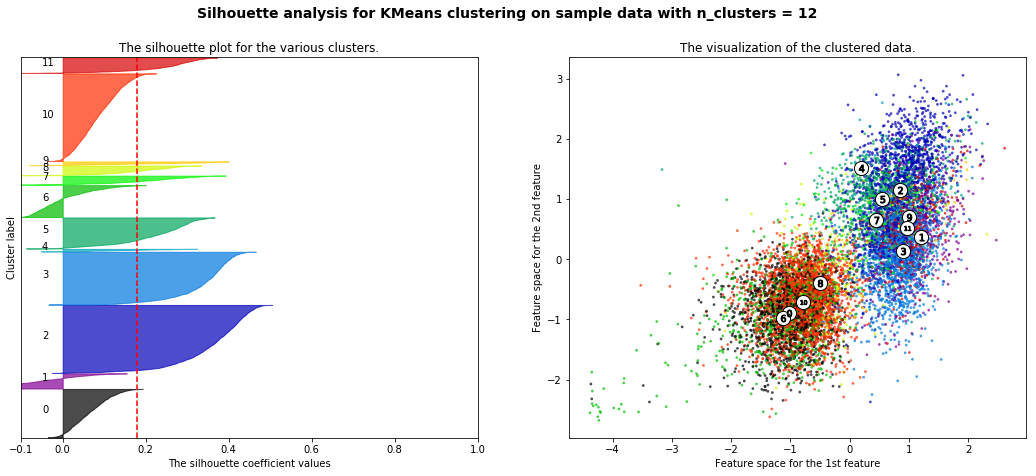

In [4]:
from __future__ import print_function

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
print (X.shape)


range_n_clusters = [4, 5, 6, 7, 8, 9, 10, 11, 12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = MiniBatchKMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

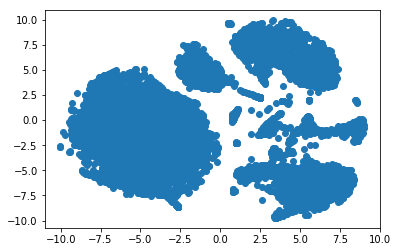

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,init='pca', random_state=0)
Y = tsne.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))



Estimated number of clusters: 321
Silhouette Coefficient: 0.047


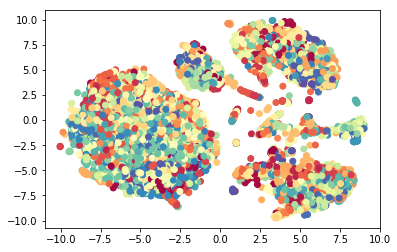

In [7]:
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Spectral)
plt.show()

In [8]:
from sklearn.cluster import DBSCAN
db = DBSCAN(min_samples=100, eps=4.).fit(X)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 6
Silhouette Coefficient: 0.337


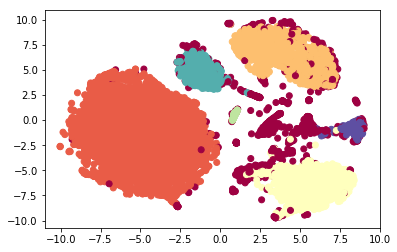

In [9]:
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Spectral)
plt.show()

In [21]:
km = KMeans(n_clusters=7, random_state=10).fit(X)
labels = km.labels_

print('Estimated number of clusters: %d' % 7)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))


Estimated number of clusters: 7
Silhouette Coefficient: 0.604


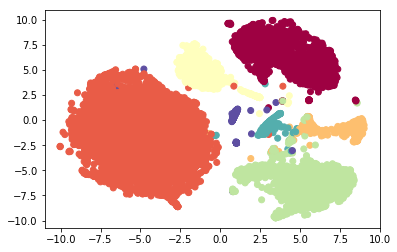

In [22]:
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Spectral)
plt.show()

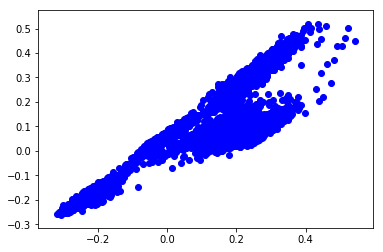

In [17]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=0.001, n_components=2)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
plt.scatter(X_back[:, 0], X_back[:, 1], c="blue")
plt.show()